# Formula 1 - Data analysis

## Import libraries

In [12]:
import polars as pl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import json
from urllib.request import urlopen

## Get the races

In [2]:
response = urlopen('https://api.openf1.org/v1/meetings')
data = json.loads(response.read().decode('utf-8'))
races = pd.DataFrame(data)

races

,meeting_name,meeting_official_name,location,country_key,country_code,country_name,circuit_key,circuit_short_name,date_start,gmt_offset,meeting_key,year,meeting_code
0,Pre-Season Testing,FORMULA 1 ARAMCO PRE-SEASON TESTING 2023,Sakhir,36,BRN,Bahrain,63,Sakhir,2023-02-23T07:00:00+00:00,03:00:00,1140,2023,NaN
1,Bahrain Grand Prix,FORMULA 1 GULF AIR BAHRAIN GRAND PRIX 2023,Sakhir,36,BRN,Bahrain,63,Sakhir,2023-03-03T11:30:00+00:00,03:00:00,1141,2023,NaN
2,Saudi Arabian Grand Prix,FORMULA 1 STC SAUDI ARABIAN GRAND PRIX 2023,Jeddah,153,KSA,Saudi Arabia,149,Jeddah,2023-03-17T13:30:00+00:00,03:00:00,1142,2023,NaN
3,Australian Grand Prix,FORMULA 1 ROLEX AUSTRALIAN GRAND PRIX 2023,Melbourne,5,AUS,Australia,10,Melbourne,2023-03-31T01:30:00+00:00,11:00:00,1143,2023,NaN
4,Azerbaijan Grand Prix,FORMULA 1 AZERBAIJAN GRAND PRIX 2023,Baku,30,AZE,Azerbaijan,144,Baku,2023-04-28T09:30:00+00:00,04:00:00,1207,2023,NaN
5,Miami Grand Prix,FORMULA 1 CRYPTO.COM MIAMI GRAND PRIX 2023,Miami,19,USA,United States,151,Miami,2023-05-05T18:00:00+00:00,-04:00:00,1208,2023,NaN
6,Monaco Grand Prix,FORMULA 1 GRAND PRIX DE MONACO 2023,Monaco,114,MON,Monaco,22,Monte Carlo,2023-05-26T11:30:00+00:00,02:00:00,1210,2023,NaN
7,Spanish Grand Prix,FORMULA 1 AWS GRAN PREMIO DE ESPAÑA 2023,Barcelona,1,ESP,Spain,15,Catalunya,2023-06-02T11:30:00+00:00,02:00:00,1211,2023,NaN
8,Canadian Grand Prix,FORMULA 1 PIRELLI GRAND PRIX DU CANADA 2023,Montréal,46,CAN,Canada,23,Montreal,2023-06-16T17:30:00+00:00,-04:00:00,1212,2023,NaN
9,Austrian Grand Prix,FORMULA 1 ROLEX GROSSER PREIS VON ÖSTERREICH 2023,Spielberg,17,AUT,Austria,19,Spielberg,2023-06-30T15:00:00+00:00,02:00:00,1213,2023,AUT


## Get drivers of the latest race

In [6]:
response = urlopen('https://api.openf1.org/v1/drivers?session_key=latest')
data = json.loads(response.read().decode('utf-8'))
drivers = pd.DataFrame(data)
drivers

,session_key,meeting_key,broadcast_name,country_code,first_name,full_name,headshot_url,last_name,driver_number,team_colour,team_name,name_acronym
0,9662,1252,M VERSTAPPEN,NED,Max,Max VERSTAPPEN,https://media.formula1.com/d_driver_fallback_i...,Verstappen,1,3671C6,Red Bull Racing,VER
1,9662,1252,L NORRIS,GBR,Lando,Lando NORRIS,https://media.formula1.com/d_driver_fallback_i...,Norris,4,FF8000,McLaren,NOR
2,9662,1252,P GASLY,FRA,Pierre,Pierre GASLY,https://media.formula1.com/d_driver_fallback_i...,Gasly,10,0093cc,Alpine,GAS
3,9662,1252,S PEREZ,MEX,Sergio,Sergio PEREZ,https://media.formula1.com/d_driver_fallback_i...,Perez,11,3671C6,Red Bull Racing,PER
4,9662,1252,F ALONSO,ESP,Fernando,Fernando ALONSO,https://media.formula1.com/d_driver_fallback_i...,Alonso,14,229971,Aston Martin,ALO
5,9662,1252,C LECLERC,MON,Charles,Charles LECLERC,https://media.formula1.com/d_driver_fallback_i...,Leclerc,16,E80020,Ferrari,LEC
6,9662,1252,L STROLL,CAN,Lance,Lance STROLL,https://media.formula1.com/d_driver_fallback_i...,Stroll,18,229971,Aston Martin,STR
7,9662,1252,K MAGNUSSEN,DEN,Kevin,Kevin MAGNUSSEN,https://media.formula1.com/d_driver_fallback_i...,Magnussen,20,B6BABD,Haas F1 Team,MAG
8,9662,1252,Y TSUNODA,JPN,Yuki,Yuki TSUNODA,https://media.formula1.com/d_driver_fallback_i...,Tsunoda,22,6692FF,RB,TSU
9,9662,1252,A ALBON,THA,Alexander,Alexander ALBON,https://media.formula1.com/d_driver_fallback_i...,Albon,23,64C4FF,Williams,ALB


## Display the speed according to the gear

,meeting_key,session_key,driver_number,date,rpm,speed,n_gear,throttle,drs,brake
0,1252,9662,81,2024-12-08T12:21:06.901000+00:00,3642,3,1,0,1,0
1,1252,9662,81,2024-12-08T12:21:07.141000+00:00,3914,6,1,0,1,0
2,1252,9662,81,2024-12-08T12:21:07.301000+00:00,3895,8,1,0,1,0
3,1252,9662,81,2024-12-08T12:21:07.541000+00:00,3770,11,1,0,1,0
4,1252,9662,81,2024-12-08T12:21:07.781000+00:00,3887,12,1,0,1,0


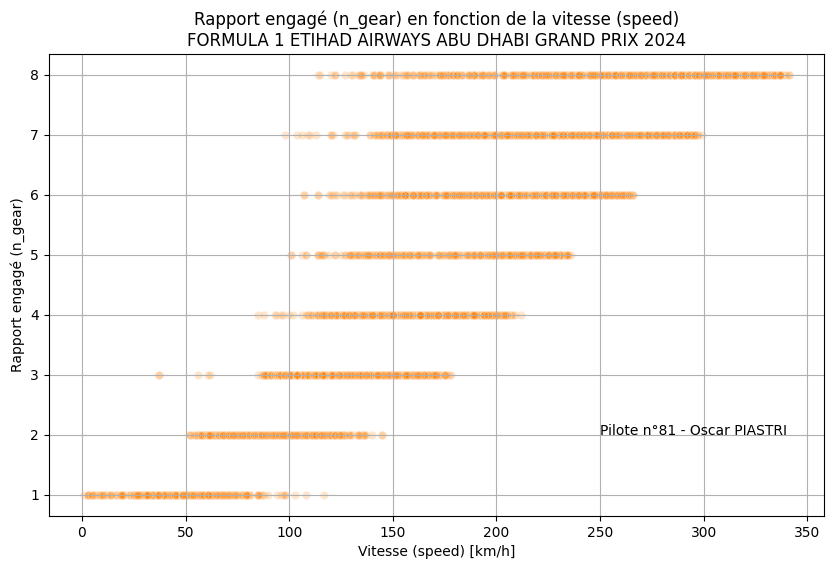

In [7]:
# Choisir le pilote
driver_no = '81'

# Obtenir les résultats
response = urlopen(f'https://api.openf1.org/v1/car_data?driver_number={driver_no}&session_key=latest&speed>=1')
data = json.loads(response.read().decode('utf-8'))
gear_speed = pd.DataFrame(data).query('n_gear > 0')
meeting_key = gear_speed['meeting_key'].values[0]
display(gear_speed.head(5))

# Tracer le graphique en fonction de la couleur du pilote
plt.figure(figsize=(10, 6))
plt.scatter(gear_speed['speed'], gear_speed['n_gear'], c=f"#{drivers.query(f'driver_number == {driver_no}')['team_colour'].values[0]}", alpha=0.2, edgecolors='w')
plt.title(f"Rapport engagé (n_gear) en fonction de la vitesse (speed)\n{races.query(f'meeting_key == {meeting_key}')['meeting_official_name'].values[0]}")
plt.xlabel('Vitesse (speed) [km/h]')
plt.ylabel('Rapport engagé (n_gear)')
plt.text(250, 2, f"Pilote n°{driver_no} - {drivers.query(f'driver_number == {driver_no}')['full_name'].values[0]}")
plt.grid(True)
plt.show()

## Display the location of the car

,meeting_key,session_key,driver_number,date,x,y,z
0,1252,9662,14,2024-12-07T15:06:30.557000+00:00,433,1912,-222
1,1252,9662,14,2024-12-07T15:06:30.716000+00:00,433,1912,-222
2,1252,9662,14,2024-12-07T15:06:31.016000+00:00,433,1912,-222
3,1252,9662,14,2024-12-07T15:06:31.197000+00:00,433,1912,-222
3595,1252,9662,14,2024-12-08T12:22:28.335000+00:00,2267,5974,-131


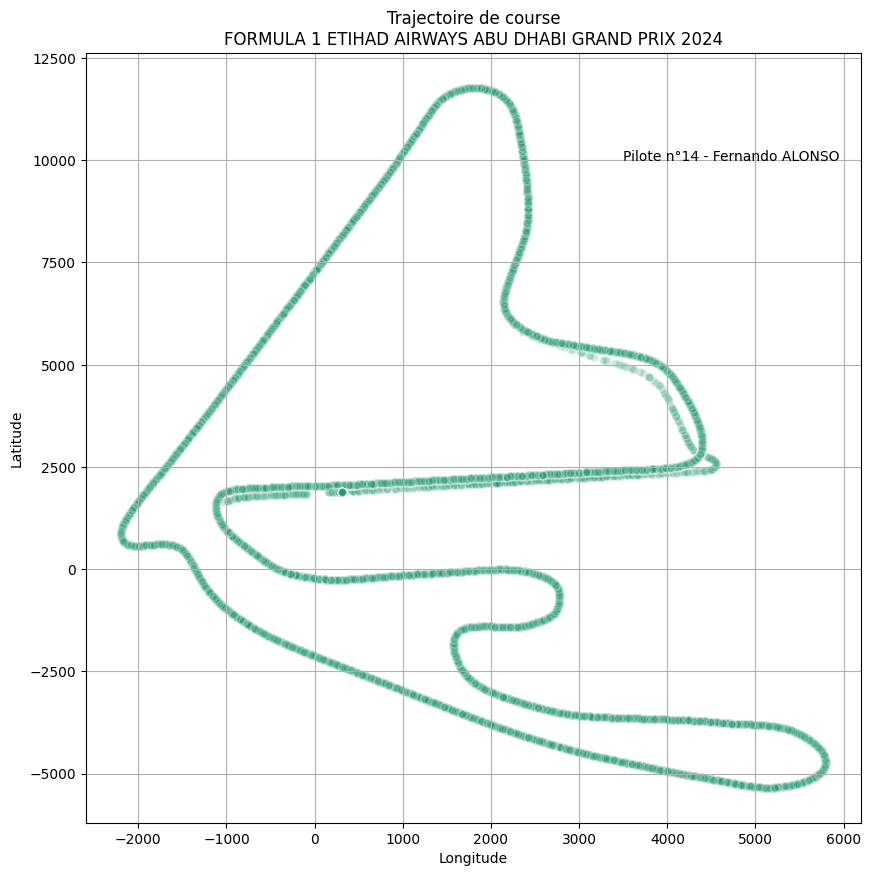

In [10]:
# Chose the driver
driver_no = '14'

# Get the datas
response = urlopen(f'https://api.openf1.org/v1/location?session_key=latest&driver_number={driver_no}')
data = json.loads(response.read().decode('utf-8'))
position = pd.DataFrame(data).query('x != 0 & y != 0 & z != 0')
meeting_key = position['meeting_key'].values[0]
display(position.head(5))

# Print the track according to the driver position
plt.figure(figsize=(10, 10))
plt.scatter(position['x'], position['y'], c=f"#{drivers.query(f'driver_number == {driver_no}')['team_colour'].values[0]}", alpha=0.2, edgecolors='w')
plt.title(f"Trajectoire de course\n{races.query(f'meeting_key == {meeting_key}')['meeting_official_name'].values[0]}")
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.text(3500, 10000, f"Pilote n°{driver_no} - {drivers.query(f'driver_number == {driver_no}')['full_name'].values[0]}")
plt.grid(True)
plt.show()

## Lap time evolution through race

,meeting_key,session_key,driver_number,i1_speed,i2_speed,st_speed,date_start,lap_duration,is_pit_out_lap,duration_sector_1,duration_sector_2,duration_sector_3,segments_sector_1,segments_sector_2,segments_sector_3,lap_number
0,1252,9662,10,287.0,294,306,None,NaN,False,NaN,38.658,33.126,"[2048, 2049, 2049, 2049, 2051]","[2049, 2049, 2049, 2049, 2049, 2049, 2049, 204...","[2048, 2048, 2048, 2048, 2048, 2048, 2048, 204...",1
1,1252,9662,10,283.0,247,302,2024-12-08T13:05:09.472000+00:00,109.760,False,18.158,46.804,44.798,"[2049, 2049, 2049, 2049, 2048]","[2048, 2049, 2048, 2048, 2048, 2049, 2048, 204...","[2051, 2049, 2049, 2048, 2048, 2049, 2049, 204...",2
2,1252,9662,10,222.0,316,298,2024-12-08T13:06:59.194000+00:00,102.837,False,25.771,44.128,32.938,"[2048, 2048, 2048, 2048, 2048]","[2048, 2048, 2048, 2048, 2048, 2048, 2048, 204...","[2048, 2048, 2048, 2049, 2048, 2048, 2048, 204...",3
3,1252,9662,10,287.0,306,322,2024-12-08T13:08:41.995000+00:00,89.406,False,17.935,37.997,33.474,"[2049, 2049, 2051, 2049, 2049]","[2048, 2048, 2048, 2049, 2049, 2049, 2048, 204...","[2049, 2048, 2048, 2048, 2049, 2048, 2048, 204...",4
4,1252,9662,10,283.0,301,303,2024-12-08T13:10:11.519000+00:00,89.611,False,18.105,38.555,32.951,"[2048, 2048, 2048, 2048, 2048]","[2049, 2048, 2048, 2048, 2048, 2048, 2049, 204...","[2048, 2049, 2048, 2048, 2048, 2048, 2048, 204...",5


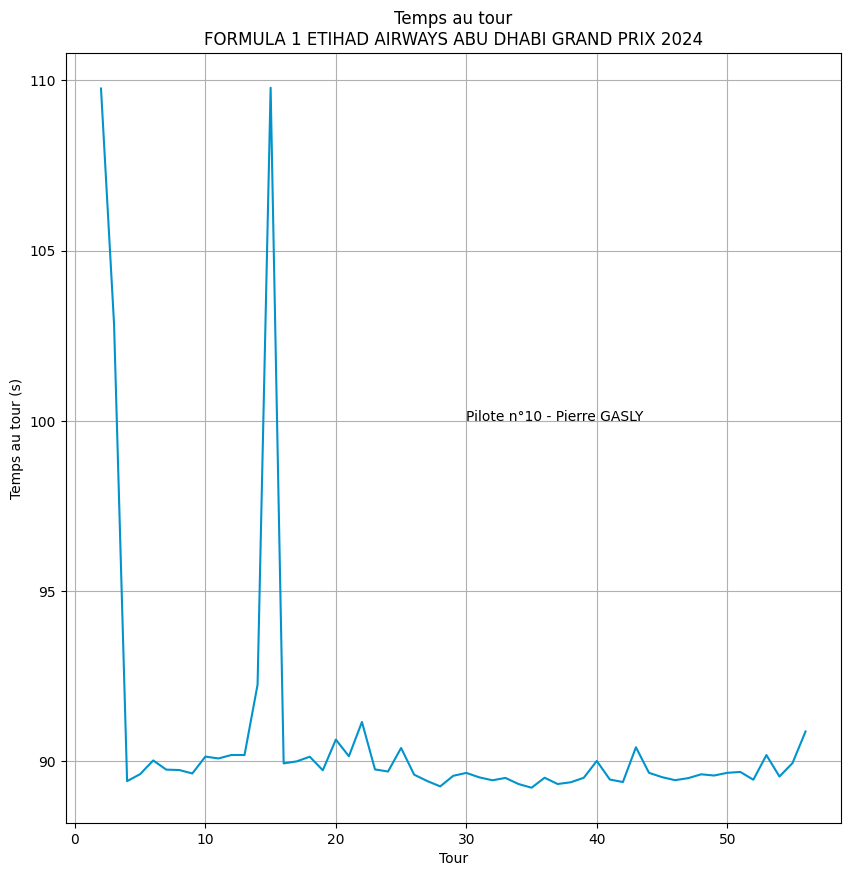

In [27]:
# Chose the driver
driver_no = '10'

# Get the datas
response = urlopen(f'https://api.openf1.org/v1/laps?session_key=latest&driver_number={driver_no}')
data = json.loads(response.read().decode('utf-8'))
laps = pd.DataFrame(data)
display(laps.head(5))

# Print the track according to the driver position
plt.figure(figsize=(10, 10))
plt.plot(laps['lap_number'], laps['lap_duration'], c=f"#{drivers.query(f'driver_number == {driver_no}')['team_colour'].values[0]}")
plt.title(f"Temps au tour\n{races.query(f'meeting_key == {meeting_key}')['meeting_official_name'].values[0]}")
plt.xlabel('Tour')
plt.ylabel('Temps au tour (s)')
plt.text(30, 100, f"Pilote n°{driver_no} - {drivers.query(f'driver_number == {driver_no}')['full_name'].values[0]}")
plt.grid(True)
plt.show()